In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
def load_npy_files(base_dir, epoch, batch, layer):
    """
    Load all .npy files from a specific epoch, batch, and layer directory.

    Args:
        base_dir (str): The base directory containing all the runs.
        epoch (str): The epoch directory name (e.g., 'epoch_01').
        batch (str): The batch directory name (e.g., 'batch_0').
        layer (str): The layer directory name (e.g., 'layer_00').

    Returns:
        list: A list of numpy arrays loaded from .npy files in the specified layer directory.
    """
    # Construct the directory path
    target_dir = os.path.join(base_dir, epoch, batch, layer)
    
    # Check if the directory exists
    if not os.path.exists(target_dir):
        raise FileNotFoundError(f"Directory {target_dir} does not exist.")
    
    # List all .npy files in the directory
    npy_files = [f for f in os.listdir(target_dir) if f.endswith('.npy')]
    
    # Load each .npy file and store it in a list
    data = []
    for npy_file in npy_files:
        file_path = os.path.join(target_dir, npy_file)
        data.append(np.load(file_path))
    
    return data


In [3]:
# Example usage
# base_dir = 'path/to/run_06'
# Check if the 'results' directory exists
if os.path.exists('results') and os.path.isdir('results'):
    os.chdir('results')
base_dir = os.path.join(os.getcwd(), 'run best')


# Now base_dir contains the full path to 'run_06'
print(f"Base directory: {base_dir}")
epoch = 'epoch 01'  # Replace with your specific epoch
batch = 'batch 0'   # Replace with your specific batch
layer = 'layer 03'  # Replace with your specific layer

npy_data = load_npy_files(base_dir, epoch, batch, layer)

# Example to print the number of .npy files loaded
print(f"Number of .npy files loaded: {len(npy_data)}")

# Optionally, process or inspect the data
for i, array in enumerate(npy_data):
    # print(array)
    print(f"Array {i+1} shape: {array.shape}")



Base directory: c:\Users\pande\OneDrive\Documents\code\DL\BTP-Transformer-explainability\results\run best
Number of .npy files loaded: 6
Array 1 shape: (20, 8, 65, 64)
Array 2 shape: (20, 8, 65, 65)
Array 3 shape: (20, 65, 512)
Array 4 shape: (20, 8, 65, 64)
Array 5 shape: (20, 8, 65, 64)
Array 6 shape: (20, 8, 65, 64)


In [4]:
# os.getcwd()

In [5]:
# # target_dir = os.path.join(base_dir, epoch, batch, layer)
# # target_dir = base_dir
# base_dir = os.getcwd()
    
# # Check if the directory exists
# if not os.path.exists(base_dir):
#     raise FileNotFoundError(f"Directory {target_dir} does not exist.")

In [6]:
os.path.exists(base_dir)

True

In [34]:
def heat_map_display(img_idx,epoch_no,head):
    
    data_list=list()
    for i in range(6):
        epoch = 'epoch '+str(epoch_no)  # Replace with your specific epoch

        batch = 'batch 0'   # Replace with your specific batch

        layer = 'layer 0'+str(i)  # Replace with your specific layer

        npy_data = load_npy_files(base_dir, epoch, batch, layer)
        data_list.append(npy_data)
    
    
    # print(type(data_list[0][5]))
    # print(type(data_list[0][5][img_idx][head]))
   
    for i in range(len(data_list)):
        
        attention_map = data_list[i][1]
        type(attention_map)
       
        plt.figure(figsize=(10, 8))  # Create a figure with a specified size
        sns.heatmap(attention_map[img_idx][head], cmap='viridis', annot=False, cbar=True, linewidths=0.5, linecolor='black')
        plt.xlabel('Key Tokens')
        plt.ylabel('Query Tokens')
        plt.title('Attention Heatmap')
        plt.show()


       
    

    


        


In [8]:


def heat_map(target_data,img_idx):
    attention_scores =target_data
    attention_scores=target_data[img_idx]

    # Average over the first dimension (samples), resulting in shape (8, 65, 64)
    # average_attention = attention_scores.mean(axis=0)
    
    # Determine the grid size
    # num_heads = average_attention.shape[0]
    # num_heads = attention_scores.shape[0]
    num_heads=4
    grid_size = 3
    # Create a figure for the grid of plots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each head's attention heatmap
    for i in range(num_heads):
        print(type(attention_scores[i]))
        sns.heatmap(attention_scores[i], annot=False,cmap='viridis',cbar=True,ax=axes[i])
        # print(attention_scores[i].shape)

        axes[i].set_title(f'Head {i + 1}')
        axes[i].set_xlabel('Key Tokens')
        axes[i].set_ylabel('Query Tokens')

    # Hide any unused subplots
    for j in range(num_heads, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [9]:
npy_data[2][2].shape

(65, 512)

In [10]:
print(type(npy_data))

<class 'list'>


In [17]:

inputs_dir= os.path.join(base_dir, 'epoch 01', batch, 'inputs.npy')
labels_dir= os.path.join(base_dir, 'epoch 01', batch, 'labels.npy')

In [16]:
def get_outputs(epoch_num):
    outputs_dir = os.path.join(base_dir, f'epoch {epoch_num:02}', batch, 'outputs.npy')
    outputs = np.load(outputs_dir)
    return outputs


In [18]:
inputs = np.load(inputs_dir)
outputs = get_outputs(1)
labels = np.load(labels_dir)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def display_image(images, idx):
    """
    Display a color image of shape (1, 3, width, height) using Matplotlib.

    Parameters:
    - image: np.ndarray of shape (1, 3, width, height)
    """
    image = images[idx]
    # print(image)
    # if image.ndim != 4 or image.shape[0] != 1 or image.shape[1] != 3:
    #     raise ValueError("Input image must have shape (1, 3, width, height)")

    # Remove the singleton dimension and transpose to (height, width, 3)
    image_display = np.transpose(image.squeeze(), (1, 2, 0))

    # Display the image
    plt.imshow(image_display)
    plt.axis('off')  # Hide axis
    plt.show()

# Example usage
# width, height = 640, 480
# image = np.random.rand(1, 3, height, width)  # Replace with actual image data
# display_image(image)


In [31]:
img_idx = 10
labels[img_idx],np.argmax( outputs[img_idx],axis=-1)

(4, 6)

In [33]:
outputs[4]

array([-0.302 ,  0.3215,  0.0659,  0.263 , -0.474 , -1.253 ,  0.92  ,
        0.339 ,  0.826 ,  0.3313], dtype=float16)

In [37]:
outputs[0]

array([-0.694  ,  0.412  ,  0.03546,  0.779  , -0.618  , -1.214  ,
        0.7075 ,  0.1812 ,  1.002  , -0.03445], dtype=float16)

In [54]:
outputs = get_outputs(72)

In [55]:
l1 = np.argmax(outputs,axis = -1)
for i in range(10):
    print(l1[i], labels[i])

3 5
8 1
1 9
4 0
0 3
3 1
1 5
6 2
0 6
3 9


In [ ]:
1. output saving 
2. downsample the attention matrix to 
3. try domsampling with mean and median and max all 3
4. (not imp) why is qkv 65x65

(try and get good heatmap and mail to sir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


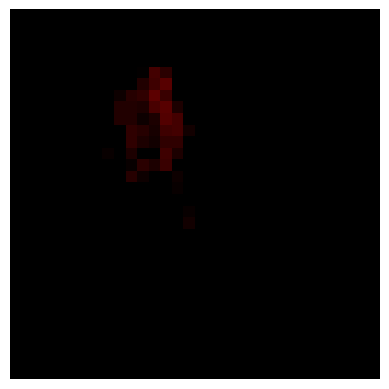

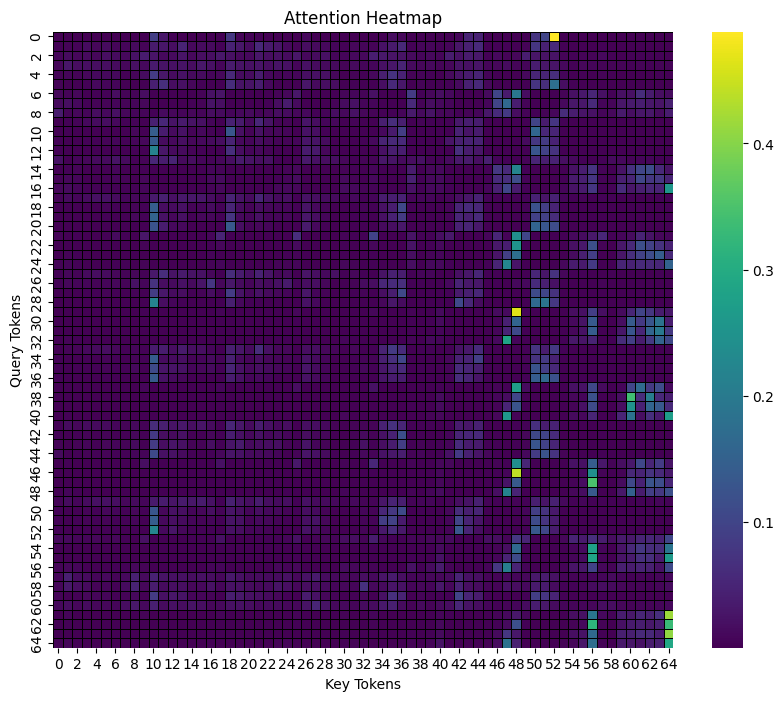

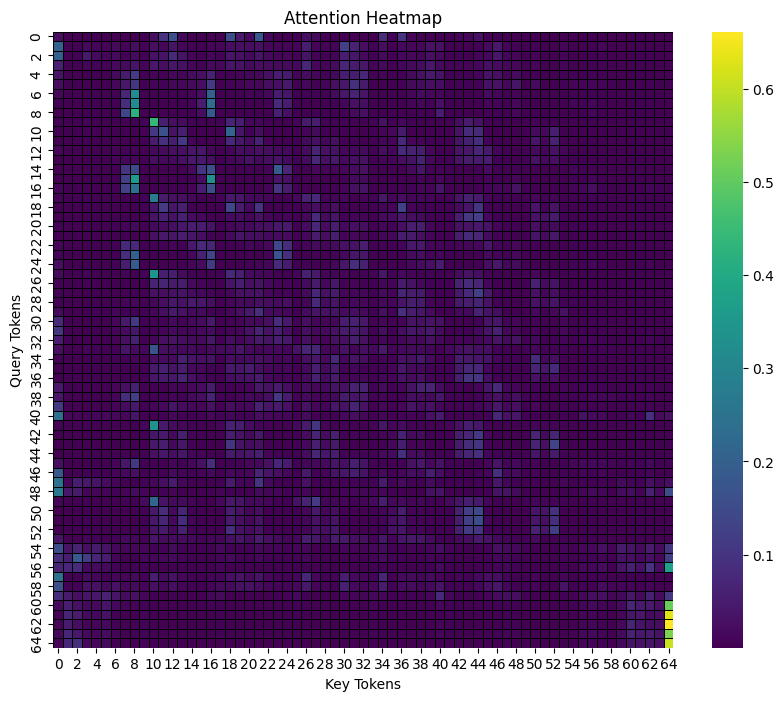

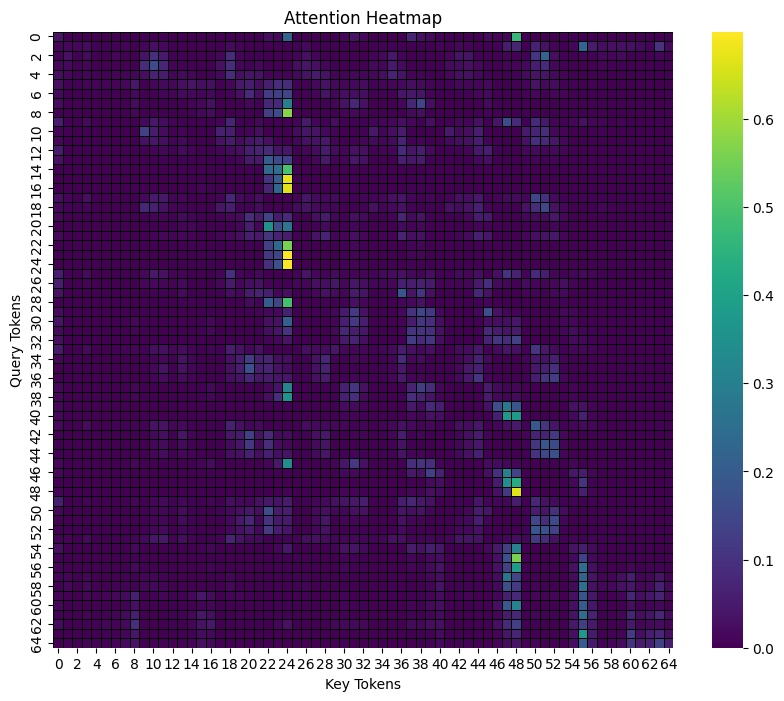

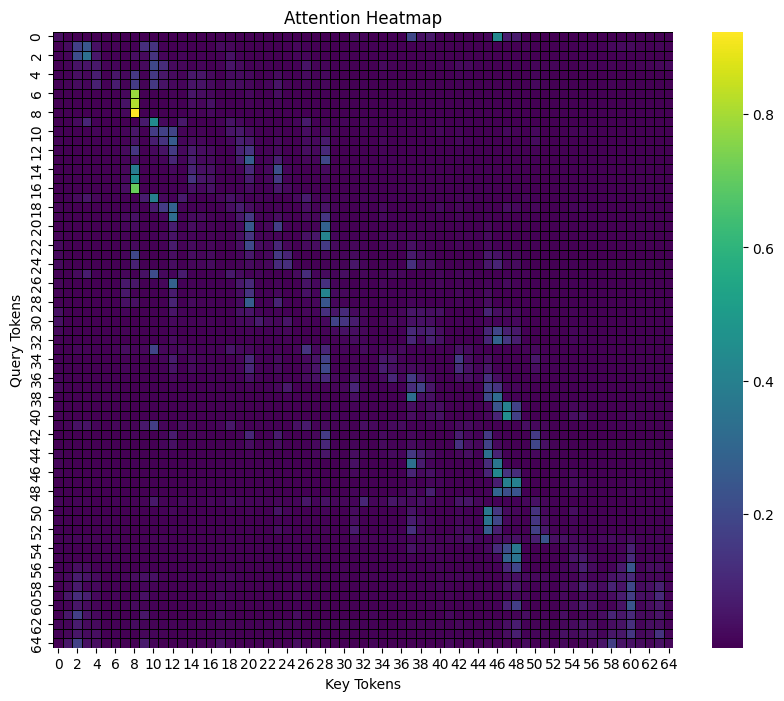

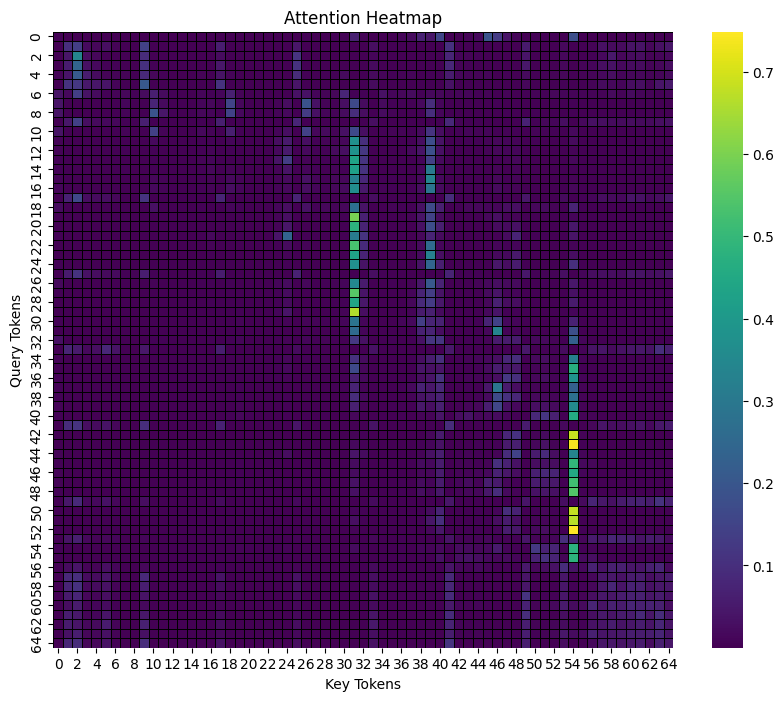

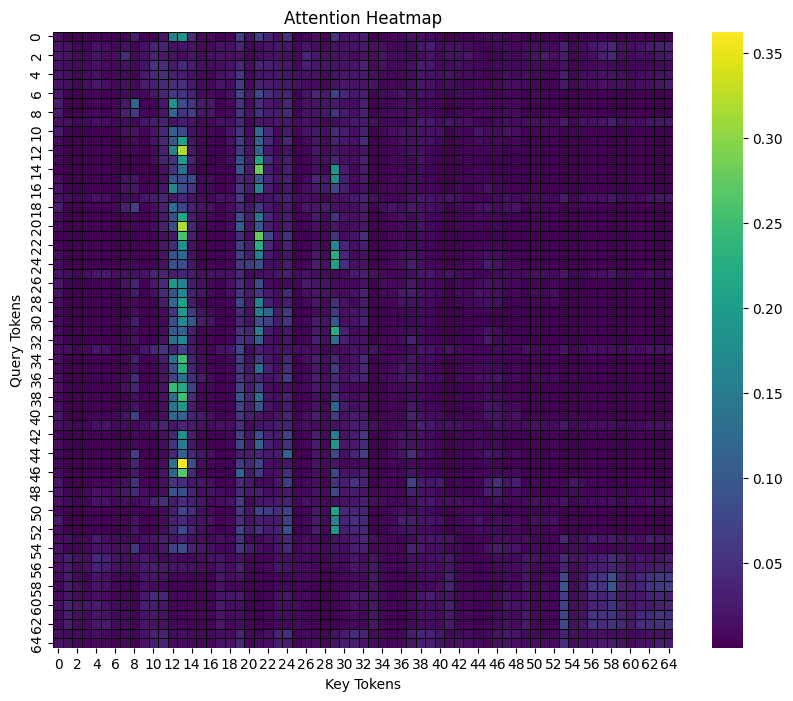

In [45]:
img_idx = 19

display_image(inputs,img_idx)
heat_map_display(img_idx,90,1)

In [22]:
inputs.shape

(20, 3, 32, 32)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


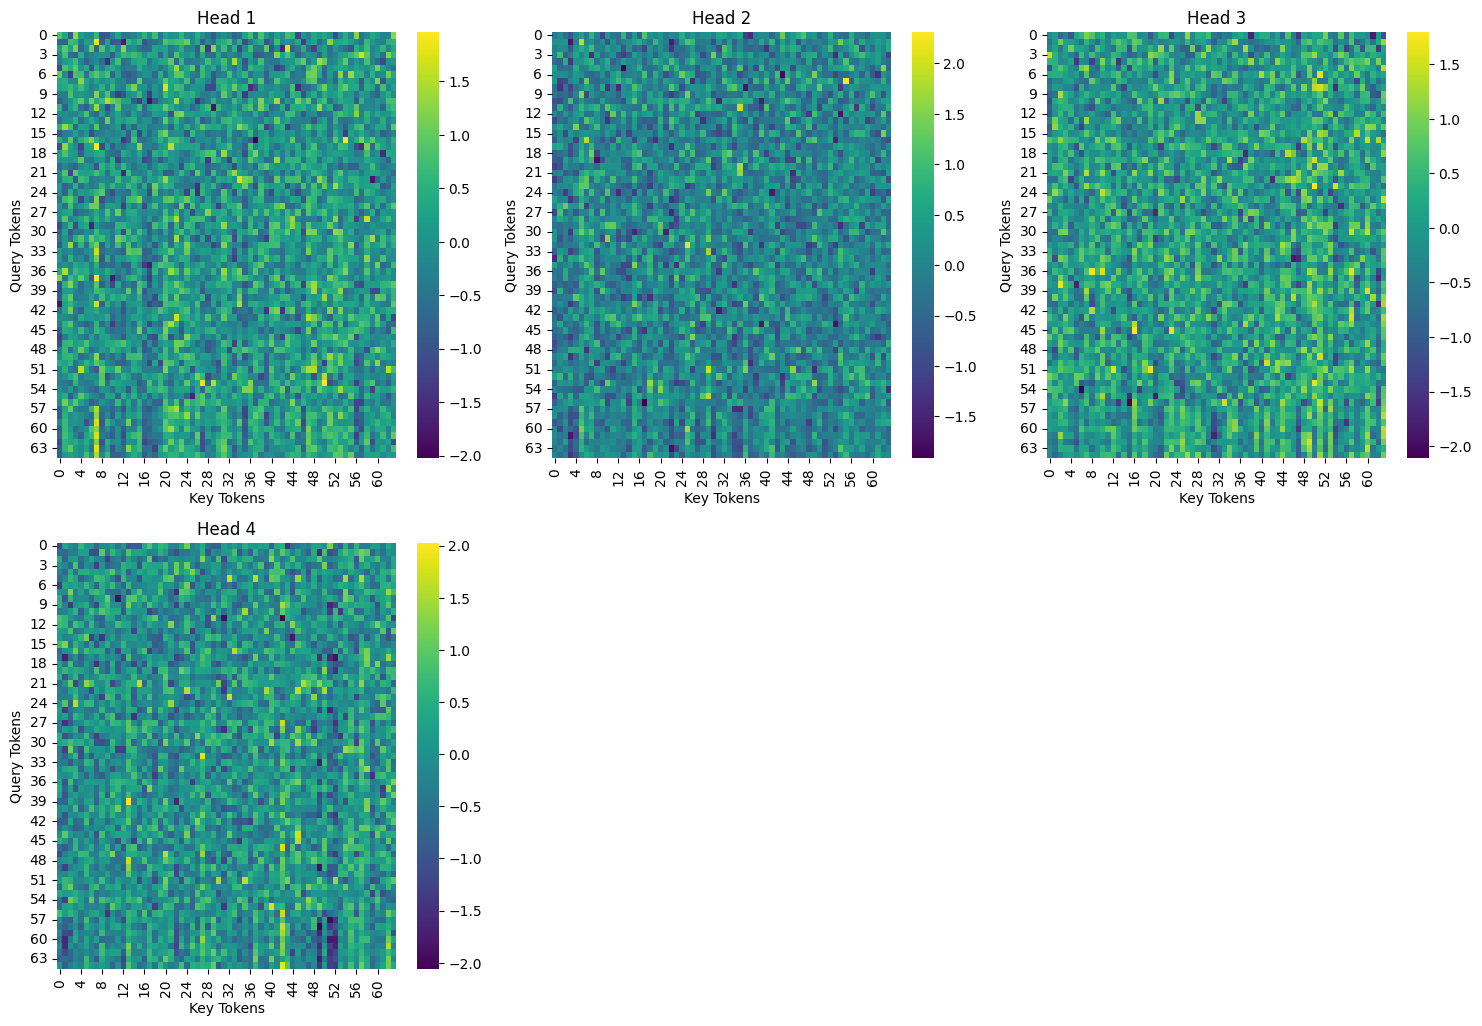

In [12]:
heat_map(npy_data[5],img_idx = 3)